In [205]:
SAVE = True 
SAVE_PATH = "../charts/"

In [206]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("../found.csv")
df.head()

,peer,cid,filesAsStr
0,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...,QmNb2LcaN8hzSNp4g7z8FtLsqvNyo3XDiR1gnDna1TWMqe,".git,README.md,main.py,"
1,12D3KooWGc7qCqwQvx9r96hwtmVhJSiXKK1qMFunXP3Kic...,QmUVTKsrYJpaxUT7dr9FpKq6AoKHhEM7eG1ZHGL56haKLG,"text/plain,"
2,12D3KooWQvVfZMKUaMeDBS7QPHL2APY4ANDPUzyaCSesos...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
3,12D3KooWBFjLgj4rdUUfLdmXwrtVgrq5FiyjkxoJYQNVT5...,NaN,NaN
4,12D3KooWT1jCHWHYxtgsKvNqK6a3n2u5U9pfqjfWtjhdVL...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN


In [207]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"
df = df[df["peer"] != MY_PEERID]
total = len(df["peer"].unique())
total

6678

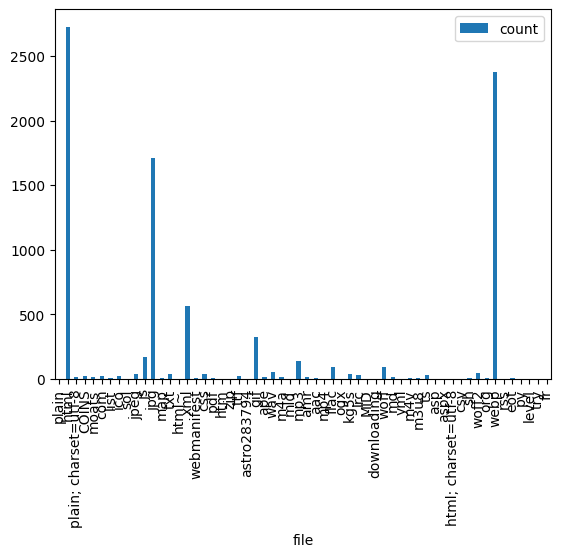

In [208]:
from collections import defaultdict
files = list(df["filesAsStr"][df["filesAsStr"].notnull()].values)
types_of_files = defaultdict(int) 
for file in files: 
    if "," in file: 
        for f in file.split(","):
            if "." in f: 
                types_of_files[f.split(".")[-1]]+=1
            elif "/" in f: 
                types_of_files[f.split("/")[1]]+=1
    else:
        types_of_files[file] +=1 
del types_of_files["png"]
del types_of_files["svg"]
del types_of_files["json"]
temp = {
    "file":[],
    "count":[]
}
for k,v in types_of_files.items():
    temp["file"].append(k)
    temp["count"].append(v)
types_of_files = dict(types_of_files)
pd.DataFrame(temp).set_index("file").plot.bar()
if SAVE: 
    plt.savefig(SAVE_PATH+"format_count.png")

In [209]:
df_cids = df.dropna(subset=["cid"])
df_cids[~df_cids['cid'].duplicated(keep=False)]["peer"].to_clipboard()


## From cid data 

In [210]:
import pandas as pd 
df = pd.read_csv("../cid_data.csv")
df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.head()

,peer,cid,filename,size,format
0,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,bootstrap.min.css,121865,text/plain; charset=utf-8
1,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,solidnames.png,19211,image/png
2,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,style.css,3058,text/plain; charset=utf-8
3,12D...HFTeF,QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC...,index.html,2140,text/html; charset=utf-8
4,12D...o1noo,QmWj827Jm1tvrz2gQmqtFjeALtvmZdfWHJfCwfYqX6QMvW,NONE,1400,application/json


In [211]:
from collections import defaultdict

peer_size = {}
peer_size["peer"] = df["peer"]
peer_size["size"] = df["size"]

peer_size_count = defaultdict(int)
for i, p in enumerate(peer_size["peer"]): 
    peer_size_count[p]+=peer_size["size"][i]

peer_size_count = {p:s for p,s in peer_size_count.items() if s > 2**23}

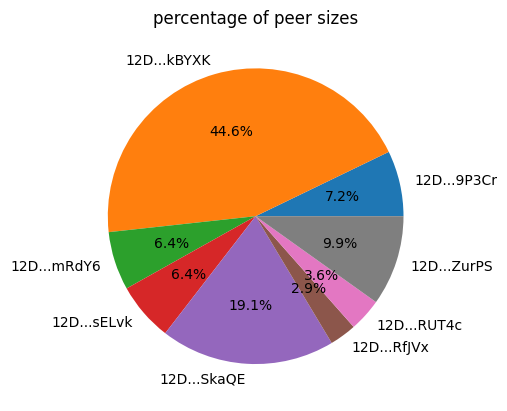

In [212]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(list(peer_size_count.values()), labels=list(peer_size_count.keys()), autopct='%1.1f%%')
plt.title("percentage of peer sizes")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_pie.png")

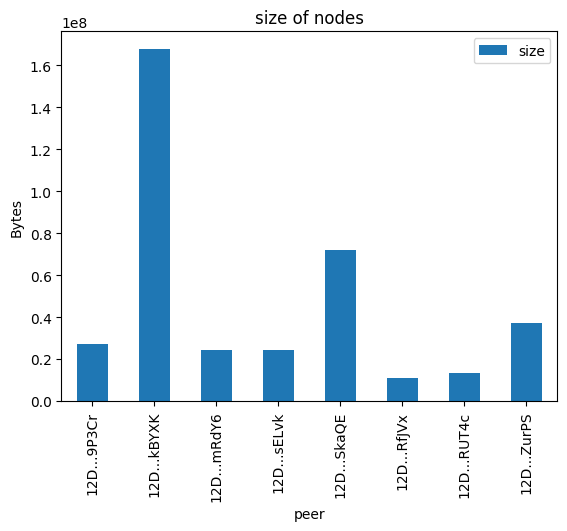

In [213]:
size_df = pd.DataFrame({"peer":list(peer_size_count.keys()), "size":list(peer_size_count.values())})
ax = size_df.set_index("peer").plot.bar(title="size of nodes")
ax.set_ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size.png")

In [214]:
df["format"].unique()

array(['text/plain; charset=utf-8', 'image/png',
       'text/html; charset=utf-8', 'application/json', 'text/plain',
       'video/mp4', 'image/gif', 'application/octet-stream',
       'application/rss+xml', 'image/x-icon', 'image/svg+xml',
       'application/javascript', 'image/jpeg', 'video/x-m4v',
       'application/vnd.apple.mpegurl', 'text/html; charset=windows-1252',
       'text/xml; charset=utf-8', 'text/csv', 'font/ttf',
       'video/quicktime', 'text/x-perl', 'application/pdf',
       'text/x-python', 'text/html; charset=iso-8859-1', 'font/woff',
       'font/woff2', 'text/html; charset=windows-1251'], dtype=object)

In [215]:
format_size_count = defaultdict(int)
for i, f in enumerate(df["format"]):
    format_size_count[f.split("/")[0]] += df["size"][i]

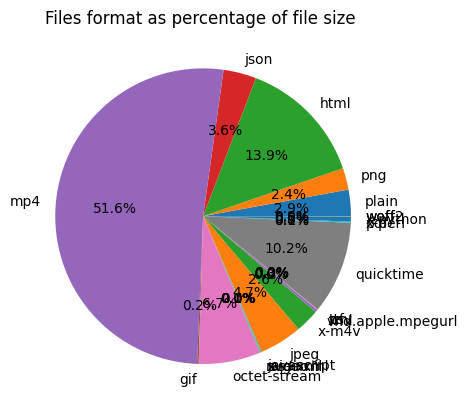

In [216]:

format_size_count = defaultdict(int)
for i, _format in enumerate(df["format"]):
    f = _format.split(";")[0] 
    format_size_count[f.split("/")[1]] += df["size"][i]

fig, ax = plt.subplots()
ax.pie(list(format_size_count.values()), labels=list(format_size_count.keys()), autopct='%1.1f%%')
plt.title("Files format as percentage of file size ")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_format_prec.png")

In [217]:

df.head()

,peer,cid,filename,size,format
0,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,bootstrap.min.css,121865,text/plain; charset=utf-8
1,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,solidnames.png,19211,image/png
2,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,style.css,3058,text/plain; charset=utf-8
3,12D...HFTeF,QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC...,index.html,2140,text/html; charset=utf-8
4,12D...o1noo,QmWj827Jm1tvrz2gQmqtFjeALtvmZdfWHJfCwfYqX6QMvW,NONE,1400,application/json


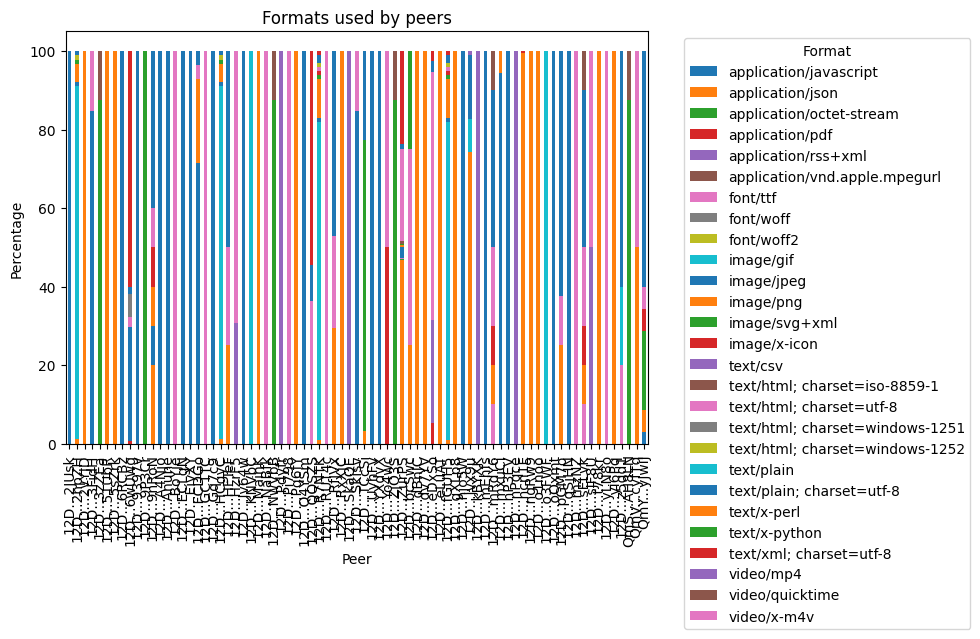

In [218]:
df_format_prec = df.groupby(['peer', 'format']).size().unstack(fill_value=0)
df_format_prec = df_format_prec.div(df_format_prec.sum(axis=1), axis=0) * 100
df_format_prec.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Peer')
plt.ylabel('Percentage')
plt.title('Formats used by peers')
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

if SAVE: 
    plt.savefig(SAVE_PATH+"formats_used_by_nodes.png")


/tmp/ipykernel_17769/1730468431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_17769/1730468431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_17769/1730468431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_17769/1730468431.py:7: SettingWith

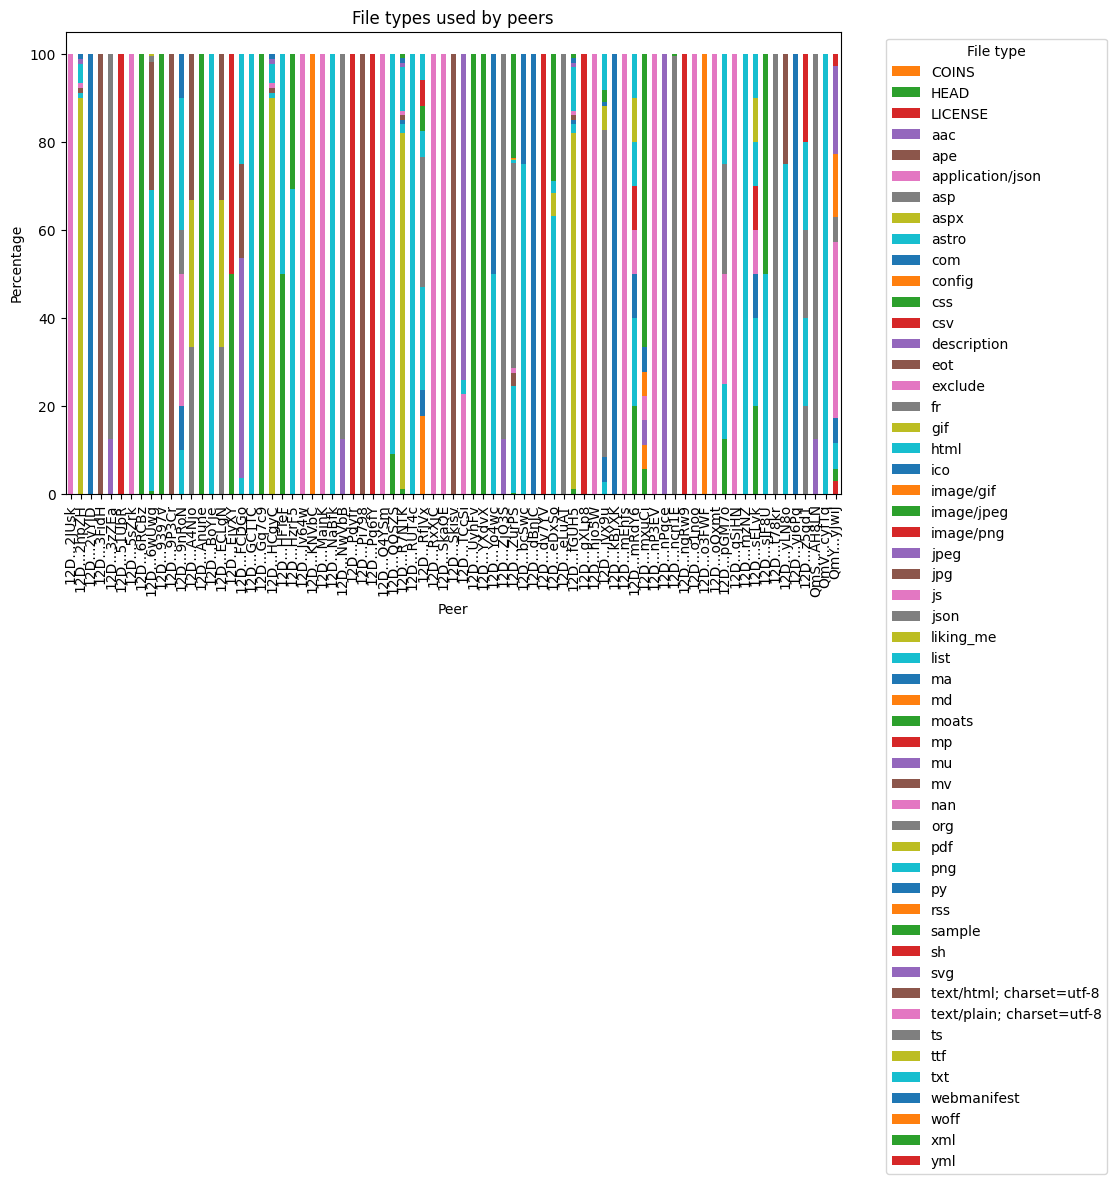

In [219]:
df_temp = df.copy()
df_temp["filename"] = df_temp["filename"].apply(lambda f: str(f))
df_temp["filename"] = df_temp["filename"].apply(lambda f: ''.join([c for c in f if not c.isdigit()]))
df_temp["filename"] = df_temp["filename"].apply(lambda f: f.split(".")[-1])
for i, filename in enumerate(df_temp["filename"]):
    if filename == "NONE":
        df_temp["filename"][i] = df_temp["format"][i]
df_file_name_peer = df_temp.groupby(['peer', 'filename']).size().unstack(fill_value=0)
df_file_name_peer= df_file_name_peer.div(df_file_name_peer.sum(axis=1), axis=0) * 100
df_file_name_peer.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Peer')
plt.ylabel('Percentage')
plt.title('File types used by peers')
plt.legend(title='File type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_file_type_prec.png")


In [220]:
df.head()

,peer,cid,filename,size,format
0,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,bootstrap.min.css,121865,text/plain; charset=utf-8
1,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,solidnames.png,19211,image/png
2,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,style.css,3058,text/plain; charset=utf-8
3,12D...HFTeF,QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC...,index.html,2140,text/html; charset=utf-8
4,12D...o1noo,QmWj827Jm1tvrz2gQmqtFjeALtvmZdfWHJfCwfYqX6QMvW,NONE,1400,application/json


['CODE_OF_CONDUCT.md', 'ARCHITECTURE.md', 'DEPLOYMENT.md', 'OVERVIEW.md', 'PHILOSOPHY.md', 'README.md']
number of markdown files: 6


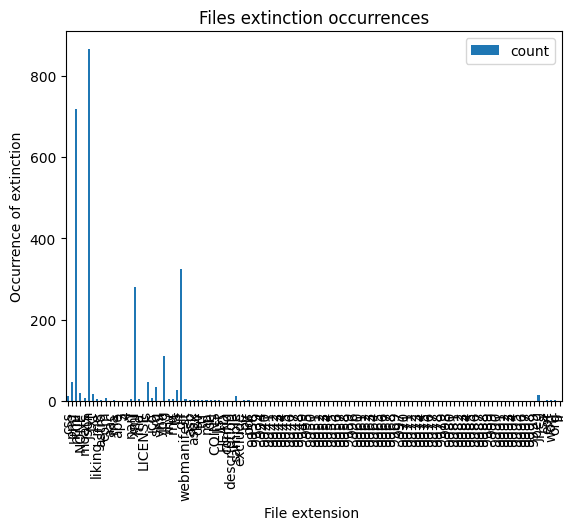

In [230]:
file_type_count = defaultdict(int)
markdown_files = []
for t in df["filename"]:
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    if ftype == "md": 
        markdown_files.append(t)
    file_type_count[ftype] += 1 
print(markdown_files)
print("number of markdown files:", len(markdown_files))

file_type_count = dict(file_type_count)
file_type_count = pd.DataFrame({"filetype": list(file_type_count.keys()), "count":list(file_type_count.values())})
file_type_count = file_type_count.set_index("filetype")
file_type_count.plot.bar()
plt.title("Files extinction occurrences")
plt.ylabel("Occurrence of extinction")
plt.xlabel("File extension ")


if SAVE: 
    plt.savefig(SAVE_PATH+"file_extinction_count.png")

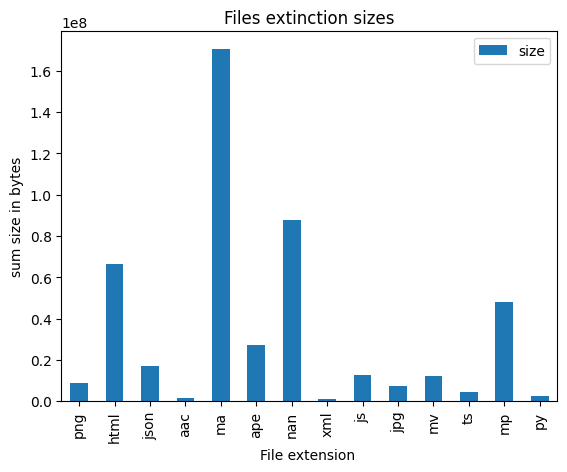

In [228]:
import numpy as np
file_type_size = defaultdict(int)
for i,t in enumerate(df["filename"]):
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    file_type_size[ftype] += int(df["size"][i])

file_type_count = dict(file_type_count)
file_type_size = { t:s for t,s in file_type_size.items() if s > 2**20}

file_type_size = pd.DataFrame({"filetype": list(file_type_size.keys()), "size":list(file_type_size.values())})
file_type_size = file_type_size.set_index("filetype")
file_type_size.plot.bar()
plt.title("Files extinction sizes")
plt.ylabel("sum size in bytes")
plt.xlabel("File extension ")


if SAVE: 
    plt.savefig(SAVE_PATH+"file_extinction_size.png")

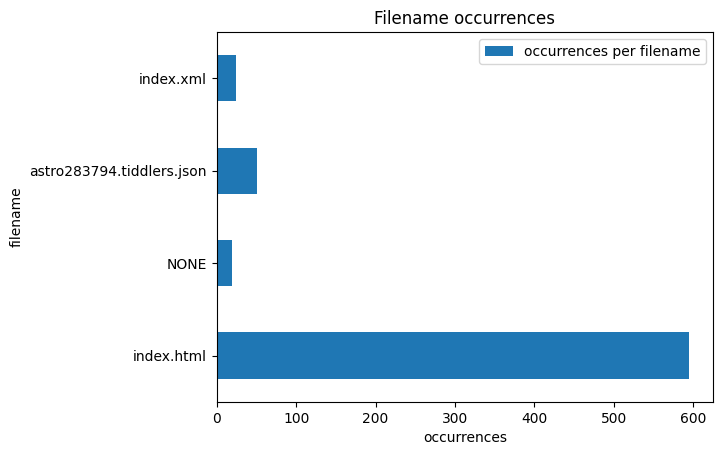

In [223]:
file_names_count = defaultdict(int)

for name in df["filename"]:
    file_names_count[str(name)] += 1

file_names_count = { f:c for f,c in file_names_count.items() if c > 10 }


file_names_count = pd.DataFrame({"filename": list(file_names_count.keys()), "occurrences per filename":list(file_names_count.values())})
file_names_count = file_names_count.set_index("filename")
file_names_count.plot.barh()
plt.title("Filename occurrences")
plt.xlabel("occurrences")


if SAVE: 
    plt.savefig(SAVE_PATH+"filename_count.png")


In [232]:
searchable = []
for i, filename in enumerate(df["filename"]): 
        if "readme" in str(filename).lower():
            searchable.append(df["cid"][i])
            print(df["cid"][i])
            print("-"*10)

print("Number of possible readme files: ",len(searchable))

QmNb2LcaN8hzSNp4g7z8FtLsqvNyo3XDiR1gnDna1TWMqe/README.md
----------
QmYaMCtgVF46b5jTJ9n95F5yTgw9ZYCRNupBeJrvnphjTW/README.html
----------
Number of possible readme files:  2


In [240]:
peers_with_index = []
for i,fn in enumerate(df["filename"]):
    p = df["peer"][i]
    if "index.html" in str(fn) and not p in peers_with_index:
        peers_with_index.append(p)
print("Number of websites found:",len(peers_with_index))
print(peers_with_index)

Number of websites found: 28
['12D...HFTeF', '12D...HzrF5', 'QmY...yJwiJ', '12D...2hpZH', '12D...R7NTK', 'QmV...cyfTq', '12D...9nRoN', '12D...pGM7o', '12D...rnzNZ', '12D...mRdY6', '12D...fGUH5', '12D...sELvk', '12D...HCgyC', '12D...RfJVx', '12D...sJF8U', '12D...QQSZS', '12D...GCTTC', '12D...yLN8o', '12D...Yo4wc', '12D...eDxSo', '12D...bcSwc', '12D...FCDGo', '12D...NaBfk', '12D...RUT4c', '12D...ZurPS', '12D...6wUwg', '12D...BoYje', '12D...z5qd1']


format count relative to node size, meaning that files that occurs often on a lot of different nodes are the most relevant nodes.  